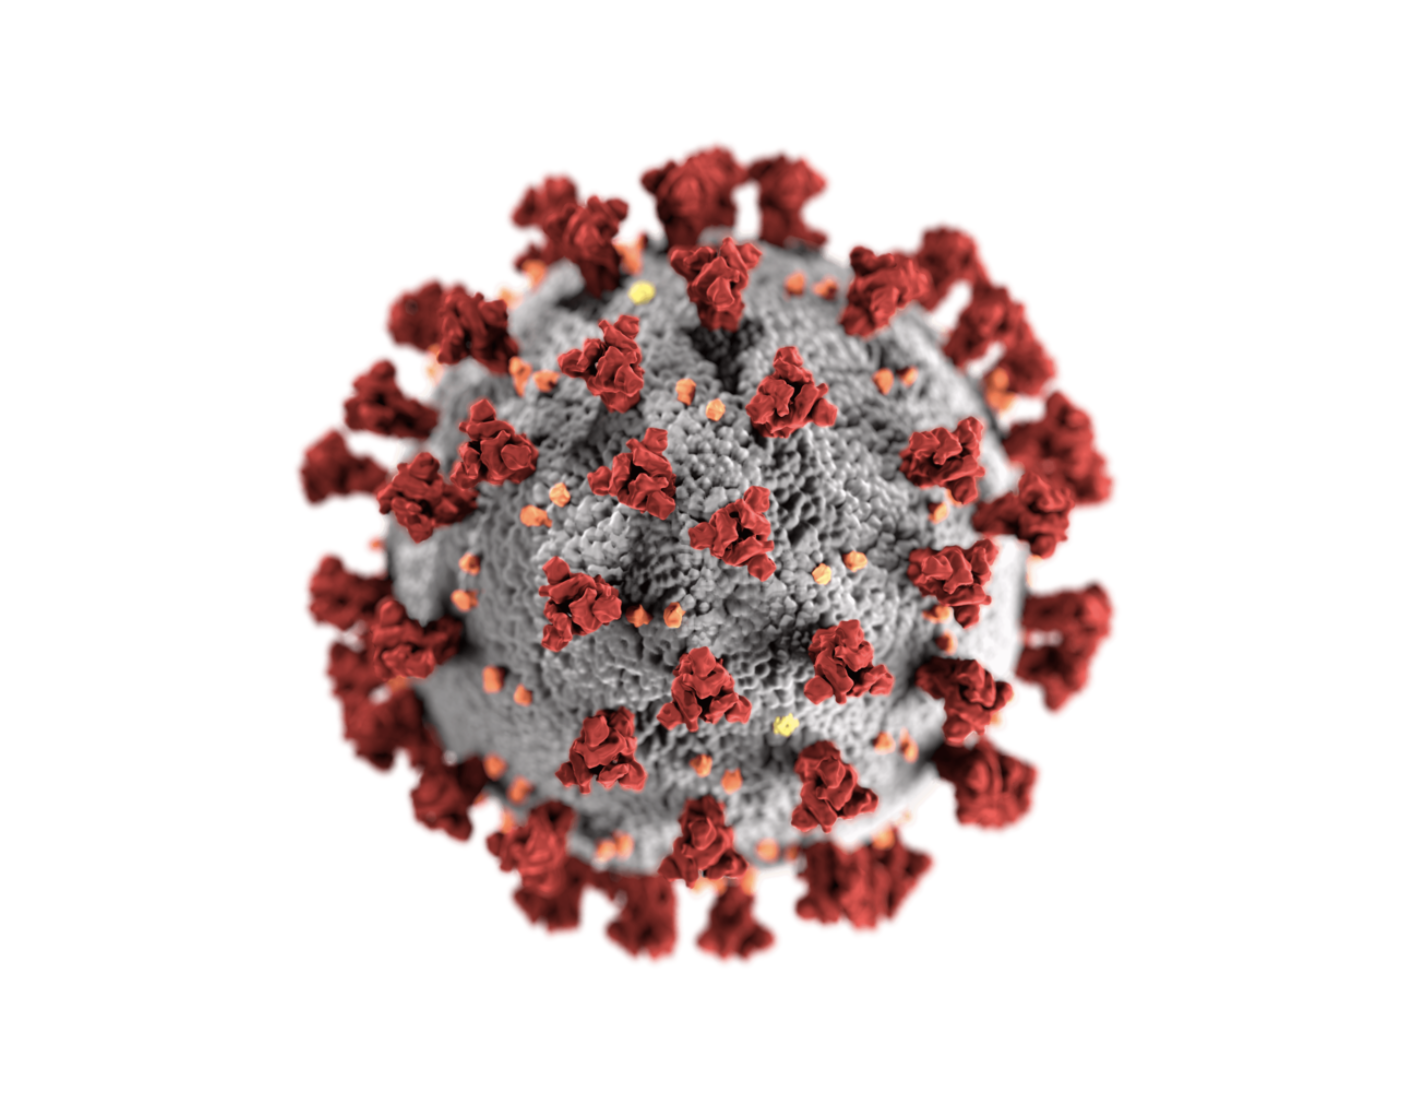Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment.

**HOW IT SPREADS**

The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces.

You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.

<table>
<tr><td>

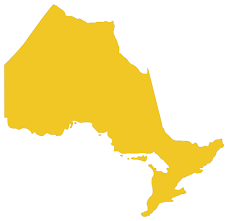

</td><td>

<p>
I was <b><font color = 'red'>waiting </font> </b>to release this kernel for a very long time. This is detailed covid analysis for <b>Ontario, Canada</b>
</p>

<br/>
<p>
Thanks,

Roy Gupta

Data Scientist - Canadian Banking Analytics

Scotiabank
</p>
</td></tr>

<tr> <td colspan = 2>

**Credits for the data provided.**

<br/>

Daily change in cases by PHU in Ontario.

https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario

<br/>

COVID-19 Vaccine Data in Ontario.

https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario

<br/>

Confirmed positive cases of COVID19 in Ontario.

https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario

<br/>

Cases by status and phu in Ontario.

https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario-by-public-health-unit-phu

<br/>

Covid testing in Ontario.

https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario

</td></tr></table>

In [ ]:
!pip3 install --upgrade nbformat
!pip3 install --upgrade plotly

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
from IPython.display import display
from plotly.graph_objects import Layout

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

In [ ]:
import datetime
import datetime
Previous_Date = datetime.datetime.today() - datetime.timedelta(days=1)
Report_Date = Previous_Date.strftime('%Y-%m-%d')
print(Report_Date) 

2022-01-27


### Data Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/MyDrive/Covid 19 Ontario')

['conposcovidloc_data_dictionary.xlsx',
 'Covid 19 Data Resource Credits.txt',
 'cases_by_status_and_phu.csv',
 'vaccines_by_age.csv',
 'vaccine_doses.csv',
 'vac_status_hosp_icu.csv',
 'cases_by_vac_status.csv',
 'cases_by_age_vac_status.csv',
 'covidtesting.csv',
 'daily_change_in_cases_by_phu.csv',
 'conposcovidloc.csv',
 'vaccines_by_age_phu.csv',
 'covidtesting_data_dictionary.xlsx',
 'vaccine_open_data_dictionary_en_fr.xlsx']

In [ ]:
# Data Source : https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario-by-public-health-unit-phu
DataFile = pd.read_csv('/content/drive/MyDrive/Covid 19 Ontario/cases_by_status_and_phu.csv')
DataFile.drop_duplicates(keep='last',inplace=True)

In [ ]:
DataFile.head(2)

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS
0,2020-04-01,ALGOMA DISTRICT,2226.0,4,1,0
1,2020-04-01,BRANT COUNTY,2227.0,10,5,0


In [ ]:
DataFile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22678 entries, 0 to 22677
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FILE_DATE       22678 non-null  object 
 1   PHU_NAME        22677 non-null  object 
 2   PHU_NUM         22677 non-null  float64
 3   ACTIVE_CASES    22678 non-null  int64  
 4   RESOLVED_CASES  22678 non-null  int64  
 5   DEATHS          22678 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [ ]:
DataFile.shape

(22678, 6)

In [ ]:
#https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario
covidtesting = pd.read_csv('/content/drive/MyDrive/Covid 19 Ontario/covidtesting.csv')

In [ ]:
covidtesting['Confirmed Positive'] = covidtesting['Confirmed Positive'].fillna('0')
covidtesting.drop_duplicates(keep='last',inplace=True)

In [ ]:
covidtesting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 721
Data columns (total 29 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Reported Date                                              722 non-null    object 
 1   Confirmed Negative                                         47 non-null     float64
 2   Presumptive Negative                                       12 non-null     float64
 3   Presumptive Positive                                       25 non-null     float64
 4   Confirmed Positive                                         722 non-null    object 
 5   Resolved                                                   710 non-null    float64
 6   Deaths                                                     682 non-null    float64
 7   Total Cases                                                720 non-null    float64
 8   Total pati

In [ ]:
covidtesting.shape

(722, 29)

## Preprocessing : Replace some Blank Values with Others

In [ ]:
DataFile['PHU_NAME'] = DataFile['PHU_NAME'].fillna('Other')
DataFile['PHU_NUM'] = DataFile['PHU_NUM'].fillna('0000')

## Basic Exploration of Ontario Region : Overall Picture (Active Cases, Deaths and Recoveries)

### Confimed and Active Cases

In [ ]:
fig = px.area(covidtesting, x="Reported Date", y="Confirmed Positive")
fig.show()

In [ ]:
import plotly.express as px
fig = px.area(DataFile, x="FILE_DATE", y="ACTIVE_CASES",color="PHU_NAME")
fig.show()

### Deaths

In [ ]:
fig = px.area(covidtesting, x="Reported Date", y="Deaths")
fig.show()

In [ ]:
fig = px.area(DataFile, x="FILE_DATE", y="DEATHS",color="PHU_NAME")
fig.show()

### Resolved / Recovered Cases

In [ ]:
fig = px.area(covidtesting, x="Reported Date", y="Resolved")
fig.show()

In [ ]:
fig = px.area(DataFile, x="FILE_DATE", y="RESOLVED_CASES",color="PHU_NAME")
fig.show()

### Total Cases under investigation

In [ ]:
covidtesting['Date'] =  pd.to_datetime(covidtesting['Reported Date'], format='%Y-%m-%d')
covidtesting['weekday'] = covidtesting['Date'].dt.dayofweek
covidtesting['day of week'] = covidtesting['weekday'].apply(lambda x: 'Weekday' if x <= 4 else 'Weekend')

In [ ]:
covidtesting['Under Investigation'] = covidtesting['Under Investigation'].fillna('0')
fig = px.bar(covidtesting, x="Reported Date", y="Under Investigation", color='day of week')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

### Total Patients Approved for Testing

In [ ]:
covidtesting['Total patients approved for testing as of Reporting Date'] = covidtesting['Total patients approved for testing as of Reporting Date'].fillna('0')
fig = px.bar(covidtesting, x="Reported Date", y="Total patients approved for testing as of Reporting Date",color='day of week')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

### Total tests completed in the last day

In [ ]:
covidtesting['Total tests completed in the last day'] = covidtesting['Total tests completed in the last day'].fillna('0')
fig = px.bar(covidtesting, x="Reported Date", y="Total tests completed in the last day",color="day of week")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

### Comparing the cases under investigation vs Total Test Completed the last day

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Under Investigation"],
    name='Under Investigation',
    marker_color=px.colors.qualitative.Dark24[3]
))

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Total tests completed in the last day"],
    name='Total tests completed in the last day',
    marker_color=px.colors.qualitative.Dark24[22]
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group',xaxis_title="Reported Date",yaxis_title="Covid Cases")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

### Comparing the cases under investigation vs Total Test Completed the last day vs Positive Cases

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()

fig = make_subplots(
    rows=3, cols=1, shared_xaxes = True, subplot_titles=("Cases Confirmed Positives", " Cases Under Investigation", "Total Test Completed in Last Day")
)

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Confirmed Positive"],
    name='Positive Cases',
    marker_color=px.colors.qualitative.Dark24[10]
),row=1, col=1)

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Under Investigation"],
    name='Cases Under Investigation',
    marker_color=px.colors.qualitative.Dark24[3]
),row=2, col=1)

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Total tests completed in the last day"],
    name='Total tests completed in the last day',
    marker_color=px.colors.qualitative.Dark24[22]
),row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Reported Date", showgrid=False, row=1, col=1)
fig.update_xaxes(title_text="Reported Date", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="Reported Date", showgrid=False, row=3, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Positive Cases", showgrid=False, row=1, col=1)
fig.update_yaxes(title_text="Cases Investigated", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="Total Test Completed", showgrid=False, row=3, col=1)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group',height=800,showlegend=False)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

### Percentage of positive test from last day

In [ ]:
fig = px.scatter(covidtesting, x="Reported Date", y="Percent positive tests in last day", color='Percent positive tests in last day',color_continuous_scale="portland")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

## Top 10 affected Cities on Active Cases, Death and Recoveries

In [ ]:
colors = ['Other Age groups',] * 10
colors[9] = 'Most Affected Age Group'
Agg_data_ActiveCases = DataFile[DataFile['FILE_DATE']==Report_Date].sort_values(by=['ACTIVE_CASES'])[24:35] # Change Date Every day
fig = px.bar(Agg_data_ActiveCases, x="ACTIVE_CASES", y="PHU_NAME", orientation='h', height=500,color=colors)
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='Active Cases: %{x} <br>City: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))
fig.show()

In [ ]:
colors = ['Other Age groups',] * 10
colors[9] = 'Most Affected Age Group'
Agg_data_ResolvedCases = DataFile[DataFile['FILE_DATE']==Report_Date].sort_values(by=['RESOLVED_CASES'])[24:35] # Change Date Every day
fig = px.bar(Agg_data_ResolvedCases, x="RESOLVED_CASES", y="PHU_NAME", orientation='h', height=500,color=colors)
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='RESOLVED_CASES: %{x} <br>City: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))

fig.show()

In [ ]:
colors = ['Other Cities in Top 10',] * 10
colors[9] = 'Most Affected City'
Agg_data_DeathCases = DataFile[DataFile['FILE_DATE']==Report_Date].sort_values(by=['DEATHS'])[24:35] # Change Date Every day
fig = px.bar(Agg_data_DeathCases, x="DEATHS", y="PHU_NAME", orientation='h', height=500, color=colors)
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='DEATHS: %{x} <br>City: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))

fig.show()

## Analysis for Toronto, Peel, York, Ottawa, Durham and Windsor : Active Cases vs Deaths and Recovered Cases

In [ ]:
Analysis_byToronto = DataFile[DataFile['PHU_NAME']=='TORONTO']
Analysis_byPeel = DataFile[DataFile['PHU_NAME']=='PEEL REGION']
Analysis_byYork = DataFile[DataFile['PHU_NAME']=='YORK REGION']
Analysis_byOttawa = DataFile[DataFile['PHU_NAME']=='CITY OF OTTAWA']
Analysis_byBruce = DataFile[DataFile['PHU_NAME']=='GREY BRUCE']
Analysis_byWaterloo = DataFile[DataFile['PHU_NAME']=='WATERLOO REGION']
Analysis_byDurham = DataFile[DataFile['PHU_NAME']=='DURHAM REGION']
Analysis_byWindsor = DataFile[DataFile['PHU_NAME']=='WINDSOR-ESSEX COUNTY']

### Lets Analyze Toronto (ACTIVE CASES VS DEATHS)

In [ ]:
fig = px.scatter(Analysis_byToronto, x="ACTIVE_CASES", y="DEATHS", color='DEATHS', hover_data=["FILE_DATE"], color_continuous_scale="portland")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

### Lets Analyze Toronto (ACTIVE CASES VS RECOVERED CASES)

In [ ]:
fig = px.scatter(Analysis_byToronto, x="ACTIVE_CASES", y="RESOLVED_CASES", color='RESOLVED_CASES',hover_data=["FILE_DATE"],color_continuous_scale="portland")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

### Lets Analyze Other 4 Top Cities (ACTIVE CASES VS DEATHS)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2, shared_yaxes = True, subplot_titles=("PEEL", "YORK", "OTTAWA", "WINDSOR")
)

# Add traces
fig.add_trace(go.Scatter(x= Analysis_byPeel["ACTIVE_CASES"], y= Analysis_byPeel["DEATHS"],mode="markers",text = Analysis_byPeel["FILE_DATE"], name='DEATHS - PEEL',marker=dict(color=Analysis_byPeel["DEATHS"],coloraxis="coloraxis")),row=1, col=1)
fig.add_trace(go.Scatter(x= Analysis_byYork["ACTIVE_CASES"], y= Analysis_byYork["DEATHS"],mode="markers",text = Analysis_byYork["FILE_DATE"], name='DEATHS - YORK',marker=dict(color=Analysis_byYork["DEATHS"],coloraxis="coloraxis")), row=1, col=2)
fig.add_trace(go.Scatter(x= Analysis_byOttawa["ACTIVE_CASES"], y= Analysis_byOttawa["DEATHS"],mode="markers",text = Analysis_byOttawa["FILE_DATE"], name='DEATHS - OTTAWA',marker=dict(color=Analysis_byOttawa["DEATHS"],coloraxis="coloraxis")), row=2, col=1)
fig.add_trace(go.Scatter(x= Analysis_byWindsor["ACTIVE_CASES"], y= Analysis_byWindsor["DEATHS"],mode="markers",text = Analysis_byWindsor["FILE_DATE"], name='DEATHS - WINDSOR',marker=dict(color=Analysis_byWindsor["DEATHS"],coloraxis="coloraxis")), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="ACTIVE_CASES", showgrid=False, row=1, col=1)
fig.update_xaxes(title_text="ACTIVE_CASES", showgrid=False, row=1, col=2)
fig.update_xaxes(title_text="ACTIVE_CASES", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="ACTIVE_CASES", showgrid=False, row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="DEATHS", showgrid=False, row=1, col=1)
fig.update_yaxes(title_text="DEATHS", showgrid=False, row=1, col=2)
fig.update_yaxes(title_text="DEATHS", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="DEATHS", showgrid=False, row=2, col=2)

# Update title and height
fig.update_layout(title_text="Ontario' Most Affected Areas, after Toronto", height=700,coloraxis=dict(colorscale='portland'),showlegend=False)
fig.update_traces(hovertemplate='ACTIVE CASES: %{x} <br> DEATHS: %{y} <br> DATE: %{text}') 

fig.show()

### Lets Analyze Other Top 4 Cities (ACTIVE CASES VS RECOVERED CASES)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2, shared_yaxes = True, subplot_titles=("PEEL", "YORK", "OTTAWA", "DURHAM")
)

# Add traces
fig.add_trace(go.Scatter(x= Analysis_byPeel["ACTIVE_CASES"], y= Analysis_byPeel["RESOLVED_CASES"],mode="markers",text = Analysis_byPeel["FILE_DATE"],name='RESOLVED - PEEL',marker=dict(color=Analysis_byPeel["RESOLVED_CASES"],coloraxis="coloraxis")),row=1, col=1)
fig.add_trace(go.Scatter(x= Analysis_byYork["ACTIVE_CASES"], y= Analysis_byYork["RESOLVED_CASES"],mode="markers", text = Analysis_byYork["FILE_DATE"],name='RESOLVED - YORK',marker=dict(color=Analysis_byYork["RESOLVED_CASES"],coloraxis="coloraxis")), row=1, col=2)
fig.add_trace(go.Scatter(x= Analysis_byOttawa["ACTIVE_CASES"], y= Analysis_byOttawa["RESOLVED_CASES"],mode="markers",text = Analysis_byOttawa["FILE_DATE"], name='RESOLVED - OTTAWA',marker=dict(color=Analysis_byOttawa["RESOLVED_CASES"],coloraxis="coloraxis")), row=2, col=1)
fig.add_trace(go.Scatter(x= Analysis_byDurham["ACTIVE_CASES"], y= Analysis_byDurham["RESOLVED_CASES"],mode="markers",text = Analysis_byDurham["FILE_DATE"], name='RESOLVED - DURHAM',marker=dict(color=Analysis_byDurham["RESOLVED_CASES"],coloraxis="coloraxis")), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="ACTIVE_CASES", showgrid=False, row=1, col=1)
fig.update_xaxes(title_text="ACTIVE_CASES", showgrid=False, row=1, col=2)
fig.update_xaxes(title_text="ACTIVE_CASES", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="ACTIVE_CASES", showgrid=False, row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="RESOLVED", showgrid=False, row=1, col=1)
fig.update_yaxes(title_text="RESOLVED", showgrid=False, row=1, col=2)
fig.update_yaxes(title_text="RESOLVED", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="RESOLVED", showgrid=False, row=2, col=2)

# Update title and height
fig.update_layout(title_text="Ontario' Mostly Recovered Areas, after Toronto", height=700,coloraxis=dict(colorscale='portland'),showlegend=False)
fig.update_traces(hovertemplate='ACTIVE CASES: %{x} <br> RESOLVED: %{y} <br> DATE: %{text}') 

fig.show()

## Daily Change in Cases - 5 Big Cities

In [ ]:
daily_change = pd.read_csv('/content/drive/MyDrive/Covid 19 Ontario/daily_change_in_cases_by_phu.csv')
daily_change.drop_duplicates(keep='last',inplace=True)

In [ ]:
daily_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 674
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            675 non-null    object 
 1   Algoma_District                 672 non-null    float64
 2   Brant_County                    672 non-null    float64
 3   Chatham_Kent                    672 non-null    float64
 4   Durham_Region                   672 non-null    float64
 5   Eastern_Ontario                 672 non-null    float64
 6   Grey_Bruce                      672 non-null    float64
 7   Haldimand_Norfolk               672 non-null    float64
 8   Haliburton_Kawartha_Pine_Ridge  672 non-null    float64
 9   Halton_Region                   672 non-null    float64
 10  City_of_Hamilton                672 non-null    float64
 11  Hastings_Prince_Edward          672 non-null    float64
 12  Huron_Perth                     672 

In [ ]:
daily_change.shape

(675, 36)

### Toronto

In [ ]:
fig = px.scatter(daily_change, x="Date", y="Toronto",color = "Toronto", color_continuous_scale="portland")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

### Other Top 4 Cities

In [ ]:
# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2, shared_yaxes = True, subplot_titles=("PEEL", "YORK", "HAMILTON", "WATERLOO")
)

# Add traces
fig.add_trace(go.Scatter(x= daily_change["Date"], y= daily_change["Peel_Region"],mode="markers",name='Daily Change - PEEL',marker=dict(color=daily_change["Peel_Region"],coloraxis="coloraxis")), row=1, col=1)
fig.add_trace(go.Scatter(x= daily_change["Date"], y= daily_change["York_Region"],mode="markers", name='Daily Change - YORK',marker=dict(color=daily_change["York_Region"],coloraxis="coloraxis")), row=1, col=2)
fig.add_trace(go.Scatter(x= daily_change["Date"], y= daily_change["City_of_Hamilton"],mode="markers", name='Daily Change - HAMILTON',marker=dict(color=daily_change["City_of_Hamilton"],coloraxis="coloraxis")), row=2, col=1)
fig.add_trace(go.Scatter(x= daily_change["Date"], y= daily_change["Waterloo_Region"],mode="markers", name='Daily Change - WATERLOO',marker=dict(color=daily_change["Waterloo_Region"],coloraxis="coloraxis")), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Date", showgrid=False, row=1, col=1)
fig.update_xaxes(title_text="Date", showgrid=False, row=1, col=2)
fig.update_xaxes(title_text="Date", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="Date", showgrid=False, row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="DAILY CHANGE", showgrid=False, row=1, col=1)
fig.update_yaxes(title_text="DAILY CHANGE", showgrid=False, row=1, col=2)
fig.update_yaxes(title_text="DAILY CHANGE", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="DAILY CHANGE", showgrid=False, row=2, col=2)

# Update title and height
fig.update_layout(title_text="Ontario' Most Affected Areas", height=700,coloraxis=dict(colorscale='portland'),showlegend=False)

fig.show()

## Lets look at Vacinations

In [ ]:
Vaccine = pd.read_csv('/content/drive/MyDrive/Covid 19 Ontario/vaccine_doses.csv')
Vaccine.drop_duplicates(keep='last',inplace=True)

In [ ]:
Vaccine.tail(3)

,report_date,previous_day_total_doses_administered,previous_day_at_least_one,previous_day_fully_vaccinated,previous_day_3doses,total_doses_administered,total_individuals_at_least_one,total_individuals_partially_vaccinated,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated,total_individuals_3doses
393,2022-01-26,79059.0,7045.0,15443.0,56428.0,30245859,12431738.0,786938.0,NaN,11644800.0,6147286.0
394,2022-01-27,79322.0,7374.0,15622.0,56177.0,30325181,12439112.0,778690.0,NaN,11660422.0,6203463.0
395,2022-01-28,77968.0,6988.0,16099.0,54656.0,30403149,12446100.0,769579.0,NaN,11676521.0,6258119.0


In [ ]:
Vaccine.shape

(396, 11)

In [ ]:
Vaccine['total_individuals_fully_vaccinated'] = Vaccine['total_individuals_fully_vaccinated'].fillna(0)
Vaccine['total_doses_in_fully_vaccinated_individuals'] = Vaccine['total_doses_in_fully_vaccinated_individuals'].fillna(0)
Vaccine['total_doses_administered'] = Vaccine['total_doses_administered'].fillna(0)
Vaccine['previous_day_total_doses_administered'] = Vaccine['previous_day_total_doses_administered'].fillna(0)
Vaccine['total_individuals_partially_vaccinated'] = Vaccine['total_individuals_partially_vaccinated'].fillna(0) 

### Total Individuals with atleast one vaccination vs Total Individuals Fully vaccinated

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=Vaccine['report_date'],
    y=Vaccine['total_individuals_at_least_one'],
    name='Atleast one Vaccination',
    mode = 'lines',
    marker_color=px.colors.qualitative.Dark24[3],
    stackgroup='one',
))

fig.add_trace(go.Scatter(
    x=Vaccine['report_date'],
    y=Vaccine['total_individuals_fully_vaccinated'],
    name='Total individuals fully vaccinated',
    marker_color=px.colors.qualitative.Dark24[22],
    stackgroup='one'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='relative',xaxis_title="Reported Date",yaxis_title="Covid Cases")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

### Fully Vaccinated Individuals vs Total Doses

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=Vaccine['report_date'],
    y=Vaccine['total_doses_administered'],
    name='Total doses administered',
    marker_color=px.colors.qualitative.Dark24[22],
    stackgroup='one'
))

fig.add_trace(go.Scatter(
    x=Vaccine['report_date'],
    y=Vaccine['total_individuals_fully_vaccinated'],
    name='Total fully vaccinated individuals',
    mode = 'lines',
    marker_color=px.colors.qualitative.Dark24[3],
    stackgroup='one'
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='relative',xaxis_title="Reported Date",yaxis_title="Covid Cases")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

## Vaccination by Age

In [ ]:
import os
os.listdir('/content/drive/MyDrive/Covid 19 Ontario')

['conposcovidloc_data_dictionary.xlsx',
 'Covid 19 Data Resource Credits.txt',
 'cases_by_status_and_phu.csv',
 'vaccines_by_age.csv',
 'vaccine_doses.csv',
 'vac_status_hosp_icu.csv',
 'cases_by_vac_status.csv',
 'cases_by_age_vac_status.csv',
 'covidtesting.csv',
 'daily_change_in_cases_by_phu.csv',
 'conposcovidloc.csv',
 'vaccines_by_age_phu.csv',
 'covidtesting_data_dictionary.xlsx',
 'vaccine_open_data_dictionary_en_fr.xlsx']

In [ ]:
Vaccination_by_Age = pd.read_csv('/content/drive/MyDrive/Covid 19 Ontario/vaccines_by_age.csv')
Vaccination_by_Age.drop_duplicates(keep='last',inplace=True)
Vaccination_by_Age = Vaccination_by_Age[Vaccination_by_Age['Date']==Report_Date]
Vaccination_by_Age = Vaccination_by_Age[0:9]

In [ ]:
Vaccination_one_dose = Vaccination_by_Age.sort_values(by=['Percent_at_least_one_dose']).reset_index()
Vaccination_one_dose.drop(['index','Total population'],axis=1,inplace=True)

Vaccination_full_dose = Vaccination_by_Age.sort_values(by=['Percent_fully_vaccinated']).reset_index()
Vaccination_full_dose.drop(['index','Total population'],axis=1,inplace=True)

Vaccination_one_dose['Percent_at_least_one_dose'] = Vaccination_one_dose['Percent_at_least_one_dose']*100
Vaccination_full_dose['Percent_fully_vaccinated'] = Vaccination_full_dose['Percent_fully_vaccinated']*100

In [ ]:
Vaccination_one_dose.head(2)

,Date,Agegroup,At least one dose_cumulative,Second_dose_cumulative,fully_vaccinated_cumulative,third_dose_cumulative,Percent_at_least_one_dose,Percent_fully_vaccinated,Percent_3doses
0,2022-01-27,05-11yrs,568093,NaN,142242.0,0.0,52.67,0.1319,0.0000
1,2022-01-27,12-17yrs,834829,NaN,800357.0,14054.0,86.84,0.8325,0.0146


### Vaccine By Age : At least one dose

In [ ]:
colors = ['Other Age Groups',] * 9
colors[8] = 'Mostly Vaccinated Age Group'
fig = px.bar(Vaccination_one_dose, x="Percent_at_least_one_dose", y="Agegroup", orientation='h', height=500, color=colors)
fig.update_yaxes(dtick=1,tickformat='.0f%')
fig.update_traces(hovertemplate='Vaccine Doses: %{x}% <br>Age: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))

fig.show()

### Vaccine By Age : Fully Vaccinated

In [ ]:
colors = ['Other Age Groups',] * 9
colors[8] = 'Mostly Vaccinated Age Group'
fig = px.bar(Vaccination_full_dose, x="Percent_fully_vaccinated", y="Agegroup", orientation='h', height=500, color=colors)
fig.update_yaxes(dtick=1,tickformat='.0%')
fig.update_traces(hovertemplate='Vaccine Doses: %{x}% <br>Age: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))

fig.show()

## Confirmed Positive Cases in Ontario

In [ ]:
os.listdir('/content/drive/MyDrive/Covid 19 Ontario')

['conposcovidloc_data_dictionary.xlsx',
 'Covid 19 Data Resource Credits.txt',
 'cases_by_status_and_phu.csv',
 'vaccines_by_age.csv',
 'vaccine_doses.csv',
 'vac_status_hosp_icu.csv',
 'cases_by_vac_status.csv',
 'cases_by_age_vac_status.csv',
 'covidtesting.csv',
 'daily_change_in_cases_by_phu.csv',
 'conposcovidloc.csv',
 'vaccines_by_age_phu.csv',
 'covidtesting_data_dictionary.xlsx',
 'vaccine_open_data_dictionary_en_fr.xlsx']

In [ ]:
Confirmed = pd.read_csv('/content/drive/MyDrive/Covid 19 Ontario/conposcovidloc.csv')
Confirmed.drop_duplicates(keep='last',inplace=True)

In [ ]:
Confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014646 entries, 0 to 1021435
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Row_ID                     1014646 non-null  float64
 1   Accurate_Episode_Date      1014646 non-null  object 
 2   Case_Reported_Date         1014646 non-null  object 
 3   Test_Reported_Date         995077 non-null   object 
 4   Specimen_Date              1010176 non-null  object 
 5   Age_Group                  1014646 non-null  object 
 6   Client_Gender              1014646 non-null  object 
 7   Case_AcquisitionInfo       1014646 non-null  object 
 8   Outcome1                   1014646 non-null  object 
 9   Outbreak_Related           143532 non-null   object 
 10  Reporting_PHU_ID           1014646 non-null  int64  
 11  Reporting_PHU              1014646 non-null  object 
 12  Reporting_PHU_Address      1014646 non-null  object 
 13  Reporting_PH

In [ ]:
Confirmed.shape

(1014646, 18)

In [ ]:
Confirmed.head(2)

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1.0,2019-05-30,2020-05-05,2020-05-05,2020-05-03,50s,FEMALE,CC,Resolved,NaN,2260,Simcoe Muskoka District Health Unit,15 Sperling Drive,Barrie,L4M 6K9,www.simcoemuskokahealth.org,44.410713,-79.686306
1,2.0,2019-11-20,2020-10-21,2020-11-21,2019-11-20,20s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,4913,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156


### Lets Check the affected areas on a Map - Fatal Cases

In [ ]:
FatalCases = Confirmed[Confirmed['Outcome1']=='Fatal'] 

Agg_data_FatalCases = pd.DataFrame(FatalCases.groupby(['Reporting_PHU','Reporting_PHU_Address','Reporting_PHU_City','Reporting_PHU_Postal_Code',  \
                                                          'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],sort=True)["Outcome1"].count()).reset_index().sort_values(by=['Outcome1'])
Agg_data_FatalCases = Agg_data_FatalCases.reset_index()
Agg_data_FatalCases = Agg_data_FatalCases.drop(['index'],axis=1)	

In [ ]:
max_lat = Agg_data_FatalCases['Reporting_PHU_Latitude'].max()
min_lat = Agg_data_FatalCases['Reporting_PHU_Latitude'].min()
max_lon = Agg_data_FatalCases['Reporting_PHU_Longitude'].max()
min_lon = Agg_data_FatalCases['Reporting_PHU_Longitude'].min()
avg_lat = Agg_data_FatalCases['Reporting_PHU_Latitude'].mean()
avg_lon = Agg_data_FatalCases['Reporting_PHU_Longitude'].mean()

In [ ]:
Agg_data_FatalCases['text'] = Agg_data_FatalCases['Reporting_PHU'] + ', '+ Agg_data_FatalCases['Reporting_PHU_Address'] + ', ' + Agg_data_FatalCases['Reporting_PHU_City'] + ', ON ' + Agg_data_FatalCases['Reporting_PHU_Postal_Code'] + ' -- ' + \
                                 'Covid Cases: ' + Agg_data_FatalCases['Outcome1'].astype(str)

fig = px.scatter_geo(Agg_data_FatalCases,
        locationmode = 'USA-states',
        lat = 'Reporting_PHU_Latitude',
        lon = 'Reporting_PHU_Longitude',
        size = 'Outcome1',
        hover_name = 'text',
        color = 'Outcome1',
        color_continuous_scale="portland",
        hover_data={'Reporting_PHU_Latitude':False,'Reporting_PHU_Longitude':False,'Outcome1':False}
        )

fig.update_geos(
    resolution=50,scope = 'north america',
    showcountries=True,subunitcolor = "rgb(124,104,120)",
    projection_type="orthographic",
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="lightgrey",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, showrivers=False,
    center=dict(lon=avg_lon, lat=avg_lat),
    projection_rotation=dict(lon=avg_lon, lat=avg_lat, roll=0),
    lataxis_range=[min_lat,max_lat], lonaxis_range=[min_lon, max_lon]
)
#Fit bound is really inportant to fit the location coordinates
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#Alternative

import plotly.express as px
fig = px.scatter_mapbox(Agg_data_FatalCases, lat='Reporting_PHU_Latitude', lon='Reporting_PHU_Longitude', color ='Outcome1',size = 'Outcome1',hover_name = 'text',
                  hover_data={'Reporting_PHU_Latitude':False,'Reporting_PHU_Longitude':False,'Outcome1':False},
                  color_continuous_scale="portland", size_max=15, zoom=5,
                  mapbox_style="carto-positron")
fig.show()

### Lets Check the affected areas on a Map - Not Resolved Cases

In [ ]:
NotResolvedCases = Confirmed[Confirmed['Outcome1']=='Not Resolved'] 

Agg_data_NotResolvedCases = pd.DataFrame(NotResolvedCases.groupby(['Reporting_PHU','Reporting_PHU_Address','Reporting_PHU_City','Reporting_PHU_Postal_Code',  \
                                                          'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],sort=True)["Outcome1"].count()).reset_index().sort_values(by=['Outcome1'])
Agg_data_NotResolvedCases  = Agg_data_NotResolvedCases.reset_index()
Agg_data_NotResolvedCases  = Agg_data_NotResolvedCases.drop(['index'],axis=1)	

In [ ]:
max_lat = Agg_data_NotResolvedCases['Reporting_PHU_Latitude'].max()
min_lat = Agg_data_NotResolvedCases['Reporting_PHU_Latitude'].min()
max_lon = Agg_data_NotResolvedCases['Reporting_PHU_Longitude'].max()
min_lon = Agg_data_NotResolvedCases['Reporting_PHU_Longitude'].min()
avg_lat = Agg_data_NotResolvedCases['Reporting_PHU_Latitude'].mean()
avg_lon = Agg_data_NotResolvedCases['Reporting_PHU_Longitude'].mean()

In [ ]:
Agg_data_NotResolvedCases['text'] = Agg_data_NotResolvedCases['Reporting_PHU'] + ', '+ Agg_data_NotResolvedCases['Reporting_PHU_Address'] + ', ' + Agg_data_NotResolvedCases['Reporting_PHU_City'] + ', ON ' + Agg_data_NotResolvedCases['Reporting_PHU_Postal_Code'] + ' -- ' + \
                                 'Covid Cases: ' + Agg_data_NotResolvedCases['Outcome1'].astype(str)

fig = px.scatter_geo(Agg_data_NotResolvedCases,
        locationmode = 'USA-states',
        lat = 'Reporting_PHU_Latitude',
        lon = 'Reporting_PHU_Longitude',
        size = 'Outcome1',
        hover_name = 'text',
        color = 'Outcome1',
        color_continuous_scale="portland",
        hover_data={'Reporting_PHU_Latitude':False,'Reporting_PHU_Longitude':False,'Outcome1':False}
        )

fig.update_geos(
    resolution=50,scope = 'north america',
    showcountries=True,subunitcolor = "rgb(124,104,120)",
    projection_type="orthographic",
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="lightgrey",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, showrivers=False,
    center=dict(lon=avg_lon, lat=avg_lat),
    projection_rotation=dict(lon=avg_lon, lat=avg_lat, roll=0),
    lataxis_range=[min_lat,max_lat], lonaxis_range=[min_lon, max_lon]
)
#Fit bound is really inportant to fit the location coordinates
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#Alternative

import plotly.express as px
fig = px.scatter_mapbox(Agg_data_NotResolvedCases, lat='Reporting_PHU_Latitude', lon='Reporting_PHU_Longitude', color ='Outcome1',size = 'Outcome1',hover_name = 'text',
                  hover_data={'Reporting_PHU_Latitude':False,'Reporting_PHU_Longitude':False,'Outcome1':False},
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=5,
                  mapbox_style="carto-positron")
fig.show()

### Lets Check the affected areas on a Map - Resolved Cases

In [ ]:
ResolvedCases = Confirmed[Confirmed['Outcome1']=='Resolved'] 

Agg_data_ResolvedCases = pd.DataFrame(ResolvedCases.groupby(['Reporting_PHU','Reporting_PHU_Address','Reporting_PHU_City','Reporting_PHU_Postal_Code',  \
                                                          'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],sort=True)["Outcome1"].count()).reset_index().sort_values(by=['Outcome1'])
Agg_data_ResolvedCases  = Agg_data_ResolvedCases.reset_index()
Agg_data_ResolvedCases  = Agg_data_ResolvedCases.drop(['index'],axis=1)	

In [ ]:
max_lat = Agg_data_ResolvedCases['Reporting_PHU_Latitude'].max()
min_lat = Agg_data_ResolvedCases['Reporting_PHU_Latitude'].min()
max_lon = Agg_data_ResolvedCases['Reporting_PHU_Longitude'].max()
min_lon = Agg_data_ResolvedCases['Reporting_PHU_Longitude'].min()
avg_lat = Agg_data_ResolvedCases['Reporting_PHU_Latitude'].mean()
avg_lon = Agg_data_ResolvedCases['Reporting_PHU_Longitude'].mean()

In [ ]:
Agg_data_ResolvedCases['text'] = Agg_data_ResolvedCases['Reporting_PHU'] + ', '+ Agg_data_ResolvedCases['Reporting_PHU_Address'] + ', ' + Agg_data_ResolvedCases['Reporting_PHU_City'] + ', ON ' + Agg_data_ResolvedCases['Reporting_PHU_Postal_Code'] + ' -- ' + \
                                 'Covid Cases: ' + Agg_data_ResolvedCases['Outcome1'].astype(str)

fig = px.scatter_geo(Agg_data_ResolvedCases,
        locationmode = 'USA-states',
        lat = 'Reporting_PHU_Latitude',
        lon = 'Reporting_PHU_Longitude',
        size = 'Outcome1',
        hover_name = 'text',
        color = 'Outcome1',
        color_continuous_scale="portland_r",
        hover_data={'Reporting_PHU_Latitude':False,'Reporting_PHU_Longitude':False,'Outcome1':False}
        )

fig.update_geos(
    resolution=50,scope = 'north america',
    showcountries=True,subunitcolor = "rgb(124,104,120)",
    projection_type="orthographic",
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="lightgrey",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, showrivers=False,
    center=dict(lon=avg_lon, lat=avg_lat),
    projection_rotation=dict(lon=avg_lon, lat=avg_lat, roll=0),
    lataxis_range=[min_lat,max_lat], lonaxis_range=[min_lon, max_lon]
)
#Fit bound is really inportant to fit the location coordinates
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#Alternative

import plotly.express as px
fig = px.scatter_mapbox(Agg_data_ResolvedCases, lat='Reporting_PHU_Latitude', lon='Reporting_PHU_Longitude', color ='Outcome1',size = 'Outcome1',hover_name = 'text',
                  hover_data={'Reporting_PHU_Latitude':False,'Reporting_PHU_Longitude':False,'Outcome1':False},
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=5,
                  mapbox_style="carto-positron")
fig.show()

### Lets Analyze the Age Group

In [ ]:
Age_ConfirmedCases = Confirmed[Confirmed['Outcome1']!='Not Resolved'] 
Age_ConfirmedCases = pd.DataFrame(Age_ConfirmedCases.groupby(['Age_Group'],sort=True)["Outcome1"].count()).reset_index().sort_values(by=['Outcome1'])
Age_ConfirmedCases  = Age_ConfirmedCases.reset_index()
Age_ConfirmedCases  = Age_ConfirmedCases.drop(['index'],axis=1)	
Age_ConfirmedCases_Total = sum(Age_ConfirmedCases['Outcome1'])
Age_ConfirmedCases['Outcome_percentage'] = round((Age_ConfirmedCases['Outcome1']/Age_ConfirmedCases_Total) * 100,2)

In [ ]:
Age_ConfirmedCases.tail(5)

,Age_Group,Outcome1,Outcome_percentage
5,50s,129528,13.35
6,40s,140765,14.51
7,30s,164399,16.95
8,<20,172134,17.75
9,20s,210735,21.73


In [ ]:
Age_ConfirmedCases.shape

(10, 3)

In [ ]:
colors = ['Other Age groups',] * 10
colors[9] = 'Most Affected Age Group'
fig = px.bar(Age_ConfirmedCases, y="Age_Group", x="Outcome_percentage", orientation='h', height=500, color = colors)
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='AGE GROUP: %{x}% <br>Cases: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))
fig.show()

### Lets Analyze by Case Acquisition Info
##### Data Dictionary : [Click Here](https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/a2ea0536-1eae-4a17-aa04-e5a1ab89ca9a)

'CC' = close contact, 
'No known epi link' = Community Spread, 
'OB' = outbreak, 
'Travel', and 
'Unspecified epi link'


In [ ]:
CAI_ConfirmedCases = Confirmed[Confirmed['Outcome1']!='Not Resolved'] 
CAI_ConfirmedCases = pd.DataFrame(CAI_ConfirmedCases.groupby(['Case_AcquisitionInfo'],sort=True)["Outcome1"].count()).reset_index().sort_values(by=['Outcome1'])
CAI_ConfirmedCases  = CAI_ConfirmedCases.reset_index()
CAI_ConfirmedCases  = CAI_ConfirmedCases.drop(['index'],axis=1)	
CAI_ConfirmedCases_Total = sum(CAI_ConfirmedCases['Outcome1'])
CAI_ConfirmedCases['Outcome_percentage'] = round((CAI_ConfirmedCases['Outcome1']/CAI_ConfirmedCases_Total) * 100,2)

In [ ]:
CAI_ConfirmedCases.shape

(6, 3)

In [ ]:
colors = ['Other Case Acquisitions',] * 6
colors[5] = 'Most Affected Case Acquisition'
fig = px.bar(CAI_ConfirmedCases, y="Case_AcquisitionInfo", x="Outcome_percentage", orientation='h', height=500,color=colors)
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='AGE GROUP: %{x}% <br>Cases: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))
fig.show()

## Lets Investigate the Patients in Hospitals and Long Term Care Homes

### Number of patients hospitalized with COVID-19

In [ ]:
covidtesting['Number of patients hospitalized with COVID-19'] = covidtesting['Number of patients hospitalized with COVID-19'].fillna('0')
fig = px.bar(covidtesting, x="Reported Date", y="Number of patients hospitalized with COVID-19",color="day of week")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))

fig.show()

### Number of patients in ICU due to COVID-19 (Total vs Positive) compared to admitted in hospital

In [ ]:
covidtesting['Number of patients in ICU due to COVID-19'] = covidtesting['Number of patients in ICU due to COVID-19'].fillna('0')
covidtesting['Number of patients in ICU, testing positive for COVID-19'] = covidtesting['Number of patients in ICU, testing positive for COVID-19'].fillna('0')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Number of patients hospitalized with COVID-19"],
    name='Number of patients hospitalized with COVID-19',
    marker_color=px.colors.qualitative.Dark24[3]
))

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Number of patients in ICU due to COVID-19"],
    name='Number of patients in ICU due to COVID-19',
    marker_color=px.colors.qualitative.Dark24[11]
))

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Number of patients in ICU, testing positive for COVID-19"],
    name='Number of patients in ICU, testing positive for COVID-19',
    marker_color=px.colors.qualitative.Dark24[22]
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

### Number of patients in ICU on a ventilator due to COVID-19 (Total vs Positive) compared to admitted in hospitals

In [ ]:
covidtesting['Number of patients in ICU on a ventilator due to COVID-19'] = covidtesting['Number of patients in ICU on a ventilator due to COVID-19'].fillna('0')
covidtesting['Num. of patients in ICU on a ventilator testing positive'] = covidtesting['Num. of patients in ICU on a ventilator testing positive'].fillna('0')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Number of patients hospitalized with COVID-19"],
    name='Number of patients hospitalized with COVID-19',
    marker_color=px.colors.qualitative.Dark24[3]
))

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Number of patients in ICU on a ventilator due to COVID-19"],
    name='Number of patients in ICU on a ventilator due to COVID-19',
    marker_color=px.colors.qualitative.Dark24[11]
))

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Num. of patients in ICU on a ventilator testing positive"],
    name='Num. of patients in ICU on a ventilator testing positive',
    marker_color=px.colors.qualitative.Dark24[22]
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))
fig.show()

### Number of Positive patients on a ventilator due to COVID-19 (Total vs Positive) compared to Patients in ICU

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Number of patients in ICU, testing positive for COVID-19"],
    name='Number of patients in ICU, testing positive for COVID-19',
    marker_color=px.colors.qualitative.Dark24[3]
))

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Num. of patients in ICU on a ventilator testing positive"],
    name='Number of patients in ICU on a ventilator testing positive',
    marker_color=px.colors.qualitative.Dark24[22]
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))

fig.show()

### Total Number of Positive Cases in Long Term Care Homes - Residents and Heath Care workers

In [ ]:
covidtesting['Total Positive LTC Resident Cases'] = covidtesting['Total Positive LTC Resident Cases'].fillna('0')
covidtesting['Total Positive LTC HCW Cases'] = covidtesting['Total Positive LTC HCW Cases'].fillna('0')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Total Positive LTC Resident Cases"],
    name='Total Positive Resident Cases',
    marker_color=px.colors.qualitative.Dark24[3]
))

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Total Positive LTC HCW Cases"],
    name='Total Positive Heath Care Workers Cases',
    marker_color=px.colors.qualitative.Dark24[22]
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))

fig.show()

### Total Number of Deaths in Long Term Care Homes - Residents and Heath Care workers

In [ ]:
covidtesting['Total LTC Resident Deaths'] = covidtesting['Total LTC Resident Deaths'].fillna('0')
covidtesting['Total LTC HCW Deaths'] = covidtesting['Total LTC HCW Deaths'].fillna('0')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Total LTC Resident Deaths"],
    name='Total Deaths - Resident Cases',
    marker_color=px.colors.qualitative.Dark24[3]
))

fig.add_trace(go.Bar(
    x=covidtesting["Reported Date"],
    y=covidtesting["Total LTC HCW Deaths"],
    name='Total Deaths - Heath Care Workers',
    marker_color=px.colors.qualitative.Dark24[22]
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.998,
    xanchor="left",
    x=0.002
))

fig.show()